**Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler


from sklearn.neighbors import KNeighborsClassifier

**Read Data From The File**

In [2]:
data=pd.read_csv("magic04.data")

**Declare feature vector and target variable**

In [3]:
X = data.drop(['c'], axis=1)
y = data['c']

**Balance the Datasets: (Undersampling)**

In [4]:
# creating dataframe from X
data = pd.DataFrame(X)
# converting NDArray to series
target = pd.Series(y)

# sampling_strategy for majority class
# majority -> resamples only the majority class
undersampler = RandomUnderSampler(sampling_strategy="majority")
# resampled data and target
undersampled_data, undersampled_target = undersampler.fit_resample(data, target)
# class distribution
undersampled_target.value_counts()

c
g    6688
h    6688
Name: count, dtype: int64

**Split Dataset into Training, Validation and Test Sets**

In [5]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# test_size=1 - train_ratio
x_train, x_rest, y_train, y_rest = train_test_split(undersampled_data, undersampled_target, test_size=0.3)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
#test_size=test_ratio/(test_ratio + validation_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_rest, y_rest, test_size=0.5) 



**Create the Model and Train it**<br>
**Use Validation Set to Predict the k Value for Best Results**

Steps:<br>
1- Create an array to store our accuracy values for every k tried<br>
2- KNeighborsClassifer function finds the k nearest neighbouring points<br>
3- The .fit() function stores the dataset in an efficient Data Structure for searching.<br>
4- The .predict() function classifies a data point from the validation test by finding the 'k' nearest neighbours from the Train      Data and classify the query point based on the majority vote.<br>
5- The accuracy_score() function compares the predicted value and the actual value of the new data point<br>
6- The accuracy is added to the accuracy list and the steps are repeated for other values of k

Accuracy:  0.7422731804586241
Accuracy:  0.7492522432701895
Accuracy:  0.7617148554336989
Accuracy:  0.7597208374875374
Accuracy:  0.7711864406779662
Accuracy:  0.7632103688933201
Accuracy:  0.7711864406779662
Accuracy:  0.7721834496510469
Accuracy:  0.7741774675972084
Accuracy:  0.767198404785643
Accuracy:  0.769690927218345
Accuracy:  0.7666999002991027
Accuracy:  0.7691924227318045
Accuracy:  0.7662013958125623
Accuracy:  0.769690927218345
Accuracy:  0.767198404785643
Accuracy:  0.7701894317048853
Accuracy:  0.769690927218345
Accuracy:  0.7711864406779662
Accuracy:  0.7711864406779662
Accuracy:  0.7726819541375872
Accuracy:  0.7686939182452642
Accuracy:  0.7726819541375872
Accuracy:  0.7691924227318045


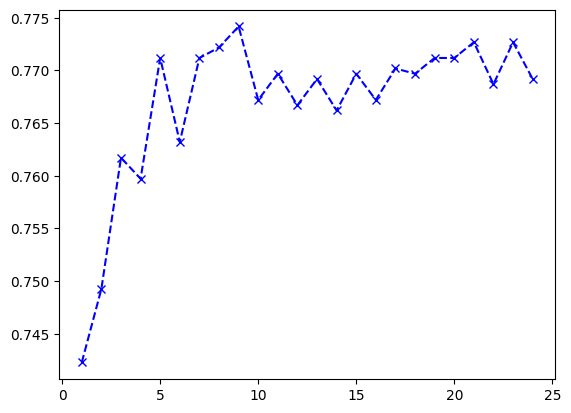

In [6]:
accuracy=[]
for i in range(1,25):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    acc = accuracy_score(y_val,y_pred)
    print("Accuracy: ", acc)
    accuracy.append(acc)
    
plt.plot(range(1,25), accuracy, color='blue', marker='x', linestyle='dashed')
        

**As the above graph shows, the best results occur at k=5 with accuracy of approximately 76%**

**Test the test set using the above model with k=5**

In [7]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
yPred=model.predict(x_test)
testDataAccuracy = accuracy_score(y_test,yPred)
print("Accuracy: ",testDataAccuracy )
    

Accuracy:  0.7603388141504733


In [8]:
print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           g       0.74      0.81      0.78      1018
           h       0.79      0.70      0.74       989

    accuracy                           0.76      2007
   macro avg       0.76      0.76      0.76      2007
weighted avg       0.76      0.76      0.76      2007



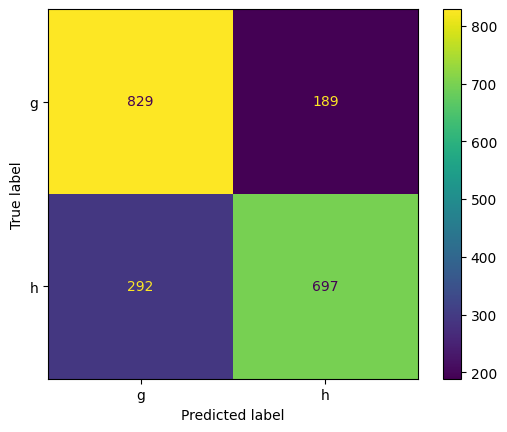

In [9]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yPred), display_labels=model.classes_).plot()
plt.show()